Importing the Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
# Loading the dataset
wine_data = pd.read_csv('winequality-red.csv')

In [4]:
# Number of rows and columns in the dataset
wine_data.shape

(1599, 12)

In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Check if there are missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [8]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


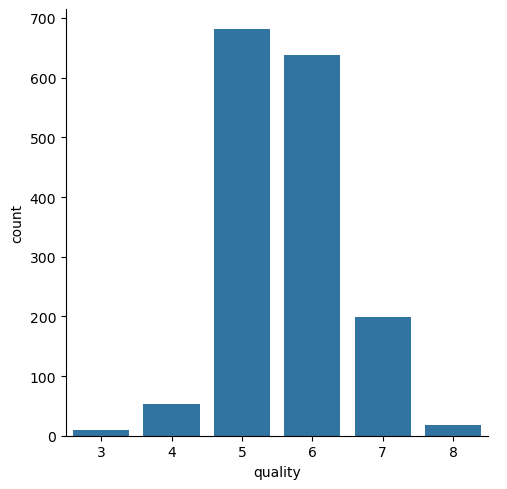

In [9]:
# Number of values for each quality
sns.catplot(x='quality', data=wine_data, kind='count')

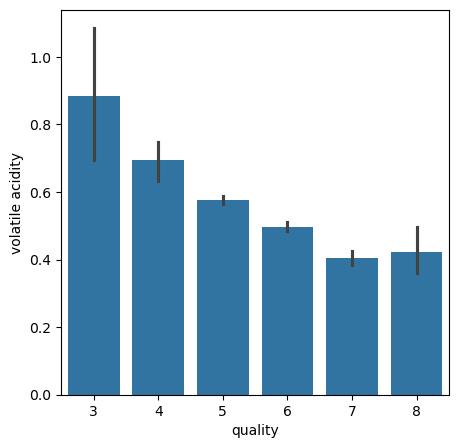

In [20]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity', data=wine_data)
plt.show()

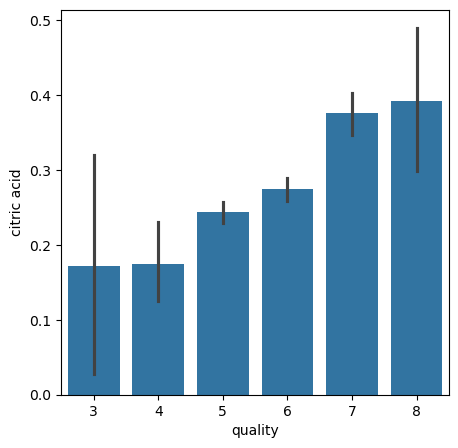

In [21]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric acid', data=wine_data)
plt.show()

In [24]:
correlation = wine_data.corr()

<Axes: >

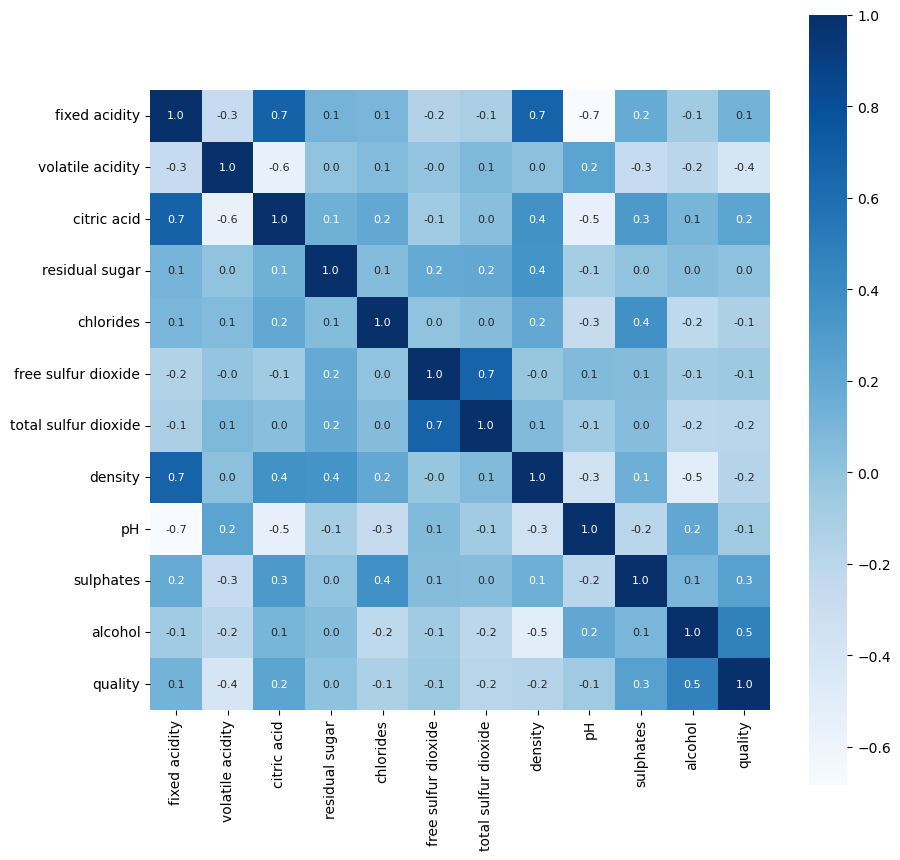

In [26]:
# Construct a heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data Preprocessing

In [27]:
X = wine_data.drop('quality', axis=1)

In [28]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Train and Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [32]:
Y.shape, Y_train.shape, Y_test.shape

((1599,), (1279,), (320,))

## Model Training: Random Forest Classifier
Uses more than 2 models in combination for prediction, in this case, decision tree.

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [36]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.93125

Building a Predictive System

In [41]:
input_data = X_test.iloc[[8]]

prediction = model.predict(input_data)

if prediction:
    print("You wine quality is good/1")
else:
    print("Your wine quality is bad/0")

print(Y_test.iloc[8])

Your wine quality is bad/0
0
